In [59]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
plt.rcParams["font.family"] = 'NanumGothic'
df = gpd.read_file("SIG/TL_SCCO_SIG.shp", encoding='euc-kr')

In [62]:
df['si'] = df['SIG_KOR_NM'].str[0:3]
df.rename(columns={'SIG_CD': 'CD'}, inplace=True)
df.head()

,CD,SIG_ENG_NM,SIG_KOR_NM,geometry,si
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",종로구
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",중구
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",용산구
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",성동구
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.082 1952633.250, 964875.590 1...",광진구


In [71]:
west = pd.DataFrame()
loc = ['27170','27230','27710','27290','47850']
for i in loc:
    temp=df[df['CD'].str.contains(i)]
    append = west.append(temp)
    west = append

west

,CD,SIG_ENG_NM,SIG_KOR_NM,geometry,si
43,27170,Seo-gu,서구,"POLYGON ((1097653.400 1765932.443, 1097584.742...",서구
45,27230,Buk-gu,북구,"POLYGON ((1100548.326 1776461.558, 1100558.656...",북구
48,27710,Dalseong-gun,달성군,"MULTIPOLYGON (((1090134.699 1758418.149, 10902...",달성군
47,27290,Dalseo-gu,달서구,"POLYGON ((1092002.026 1764133.847, 1092138.506...",달서구
221,47850,Chilgok-gun,칠곡군,"POLYGON ((1089295.195 1792489.707, 1089337.031...",칠곡군


In [72]:
west['coords'] = west['geometry'].apply(lambda x: x.representative_point().coords[:])
west['coords'] = [coords[0] for coords in west['coords']]


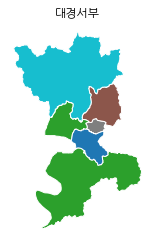

In [73]:
ax = west.plot(edgecolor="w",column="si")
ax.set_title("대경서부")
ax.set_axis_off()
plt.savefig("대경서부.png", dpi=300)
